In [ ]:
! pip install networkx matplotlib

In [1]:
import tkinter as tk
from tkinter import ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

Matplotlib is building the font cache; this may take a moment.


In [20]:
def draw_graph(graph, vertex_cover=set(), ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    pos = nx.spring_layout(graph)
    node_colors = ['lightblue' if node not in vertex_cover else 'lightgreen' for node in graph.nodes()]

    ax.clear()  # Clear the previous plot
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=12, font_weight='bold')

# Greedy

In [28]:
def vertex_cover_greedy_gui(graph, canvas, ax):
    covered_edges = set()  # Set of covered edges
    vertex_cover = set()   # Set of vertices in the vertex cover

    # While there are still uncovered edges
    while len(covered_edges) < len([(u, v) for u in graph for v in graph[u]]):
        
        # Find the vertex with the most uncovered edges
        max_degree_vertex = max(graph, key=lambda u: len([v for v in graph[u] if (u, v) not in covered_edges and (v, u) not in covered_edges]))
        
        # Add the vertex to the vertex cover
        vertex_cover.add(max_degree_vertex)

        # Mark all edges incident to the vertex as covered
        for v in graph[max_degree_vertex]:
            covered_edges.add((max_degree_vertex, v))
            covered_edges.add((v, max_degree_vertex))

        # Update the graph visualization with the current vertex cover
        draw_graph(graph, vertex_cover, ax=ax)
        canvas.draw()
        time.sleep(1)  # Delay to visualize the steps

    return vertex_cover

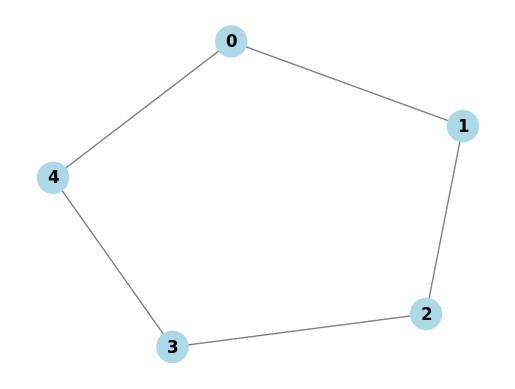

In [29]:
def start_visualization():
    num_nodes = int(nodes_entry.get())
    edges = [(int(edge.split(',')[0]), int(edge.split(',')[1])) for edge in edges_entry.get().split()]

    # Create the graph
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))
    graph.add_edges_from(edges)

    # Create a figure for plotting
    fig = plt.Figure(figsize=(5, 5))
    ax = fig.add_subplot(111)

    canvas = FigureCanvasTkAgg(fig, master=window)  # A tkinter canvas
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    draw_graph(graph)  # Initial graph plot
    canvas.draw()

    # Run Greedy Algorithm and visualize the process
    vertex_cover_greedy_gui(graph, canvas, ax=ax)

# Set up the GUI window
window = tk.Tk()
window.title("Vertex Cover Visualization")

# Label and input for number of nodes
nodes_label = tk.Label(window, text="Number of Nodes:")
nodes_label.pack()
nodes_entry = tk.Entry(window)
nodes_entry.pack()

# Label and input for edges
edges_label = tk.Label(window, text="Edges (format: u,v u,v ...):")
edges_label.pack()
edges_entry = tk.Entry(window)
edges_entry.pack()

# Start button to initiate visualization
start_button = ttk.Button(window, text="Start Visualization", command=start_visualization)
start_button.pack()

window.mainloop()

# Greedy PQ

In [30]:
import heapq

def vertex_cover_greedy_gui_optimized(graph, canvas, ax):
    covered_edges = set()  # Set of covered edges
    vertex_cover = set()   # Set of vertices in the vertex cover

    # Create a max-heap that stores all the vertices based on their degree with negative degrees (since heapq is a min-heap by default)
    heap = [(-len(graph[u]), u) for u in graph]
    heapq.heapify(heap)

    # While there are still uncovered edges
    while len(covered_edges) < len([(u, v) for u in graph for v in graph[u]]):
        # Get the vertex with the most uncovered edges
        while heap:
            max_degree, max_degree_vertex = heapq.heappop(heap)
            max_degree = -max_degree  # Convert back to positive degree

            # Recalculate the degree to ensure it is still valid after some edges are covered
            uncovered_edges = len([v for v in graph[max_degree_vertex] if (max_degree_vertex, v) not in covered_edges and (v, max_degree_vertex) not in covered_edges])
            
            if uncovered_edges == max_degree:
                break  # This is the correct vertex to choose
            else:
                # Push the recalculated degree back into the heap
                heapq.heappush(heap, (-uncovered_edges, max_degree_vertex))

        # Add the vertex to the vertex cover
        vertex_cover.add(max_degree_vertex)

        # Mark all edges incident to the vertex as covered
        for v in graph[max_degree_vertex]:
            covered_edges.add((max_degree_vertex, v))
            covered_edges.add((v, max_degree_vertex))

        # Update the graph visualization with the current vertex cover
        draw_graph(graph, vertex_cover, ax=ax)  # Use ax to plot
        canvas.draw()
        time.sleep(1)  # Delay for better visualization

    return vertex_cover

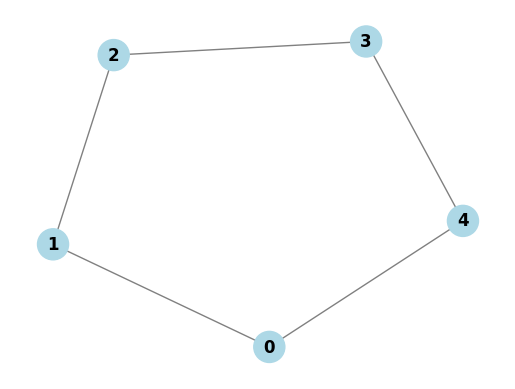

In [31]:
def start_visualization():
    num_nodes = int(nodes_entry.get())
    edges = [(int(edge.split(',')[0]), int(edge.split(',')[1])) for edge in edges_entry.get().split()]

    # Create the graph
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))
    graph.add_edges_from(edges)

    # Create a figure for plotting
    fig = plt.Figure(figsize=(5, 5))
    ax = fig.add_subplot(111)

    canvas = FigureCanvasTkAgg(fig, master=window)  # A tkinter canvas
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    draw_graph(graph)  # Initial graph plot
    canvas.draw()

    # Run the optimized Greedy Algorithm and visualize the process
    vertex_cover_greedy_gui_optimized(graph, canvas, ax=ax)

# Set up the GUI window
window = tk.Tk()
window.title("Vertex Cover Visualization")

# Label and input for number of nodes
nodes_label = tk.Label(window, text="Number of Nodes:")
nodes_label.pack()
nodes_entry = tk.Entry(window)
nodes_entry.pack()

# Label and input for edges
edges_label = tk.Label(window, text="Edges (format: u,v u,v ...):")
edges_label.pack()
edges_entry = tk.Entry(window)
edges_entry.pack()

# Start button to initiate visualization
start_button = ttk.Button(window, text="Start Visualization", command=start_visualization)
start_button.pack()

window.mainloop()